Data analysis / visualization of cities and population within California

In [1]:
#import requirements
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

%matplotlib inline

In [7]:
#import files, check fields 
data = pd.read_csv(r"data\california_cities.csv")
data.head()


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [26]:
#find the highest population -- to be used for colorbar (log base 10 (population))
data['population_total'].max()

3884307

Since the highest population is 3,884,307 --> highest colorbar would be 7

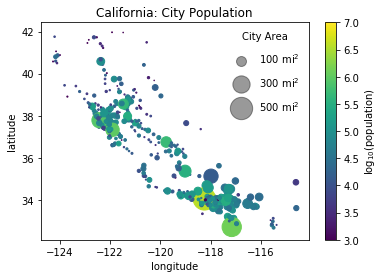

In [31]:
#interested in selecting the latitude and longitude; population and area in sq miles
longi, lati = data['longd'], data['latd']
population, area = data['population_total'], data['area_total_sq_mi']

#plot the longitude / latitude
fig = plt.figure()
plt.scatter(longi, lati, c=np.log10(population), s=area, cmap='viridis')
plt.axis(aspect='equal')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3,7)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('California: City Population')

#label the figures for the legend, scaling the sizes of the circle based on the area sq miles
for area in [100, 300, 500]:
    plt.scatter([],[], s=area, label=str(area)+' mi$^2$', c='black', alpha=0.4)

plt.legend(scatterpoints=1, labelspacing=1, frameon=False, title='City Area')

#save the image
fig.savefig('ca_city_pop.png')


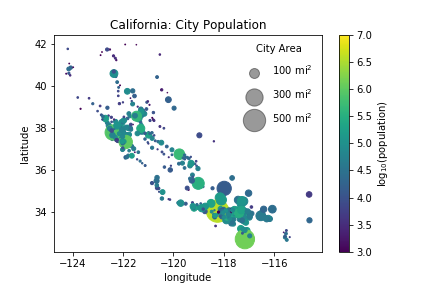

In [32]:
#test to see if the correct image was saved
import matplotlib as mpl  
from IPython.display import Image 
Image('ca_city_pop.png')